# Support Vector Regression (SVR)

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [43]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

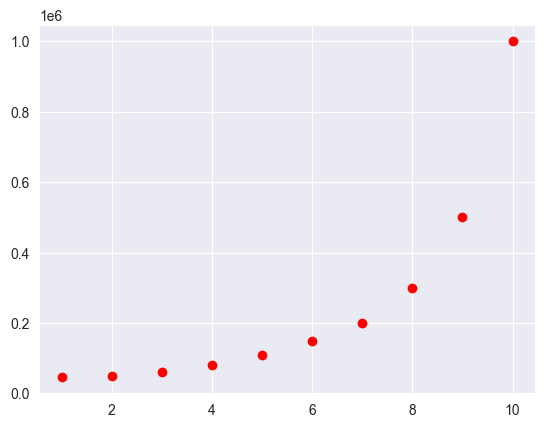

In [44]:
plt.scatter(X, y, color = 'red')
plt.show()

In [45]:
X.shape

(10, 1)

## Feature Scaling

In [46]:
# Vi vill göra skalning både på X och y. Instantiera därför två
# separata objekt av StandardScaler, t.ex sc_X och sc_y
# Vi har bara EN kolumn i X och EN i y
# Skala om X och y
# Visa dem i en plot

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [49]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

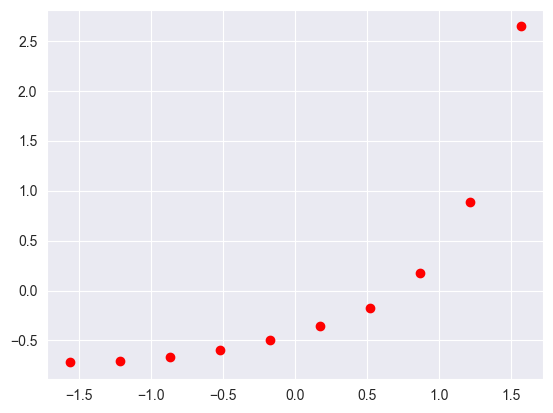

In [50]:
plt.scatter(X, y, color = 'red')
plt.show()

## Training the SVR model on the whole dataset

In [51]:
# Dessa nya X och y ska användas i klassen SVR, som vi instantierar som en regressor
# Ni måste Googla i Scikit-learn på SVR hur man importerar den
# Ni ska också kolla i dokumentationen vilka parametrar
# som kan sättas.
# Vi ska använda "kernel = 'rbf'"

In [52]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [53]:
y = np.ravel(y)
regressor.fit(X, y)

SVR()

## Predicting a new result

In [54]:
# Hur ska vi använda regressor.predict för att modellera lön om erfarenheten är 6.5 ?

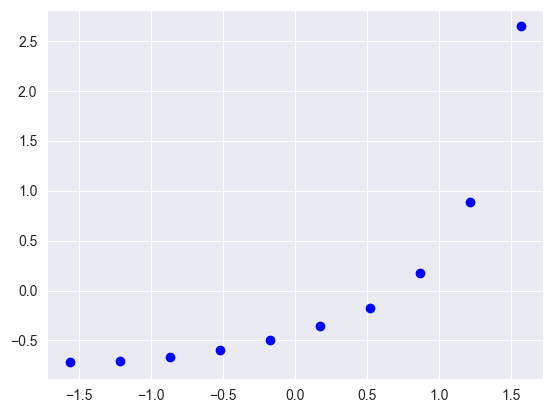

In [55]:
plt.scatter(X, y, color = 'blue')
plt.show()

In [56]:
sc_X.transform([[6.5]])

array([[0.34815531]])

In [57]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [58]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

In [59]:
# Ska plotta X värden mot predicerade y värden,
# samt lägga in ursprunglig data som punkter.
# Kom ihåg att både X och y variablerna redan 
# är transformerade! Vi måste transformera
# tillbaka bägge!


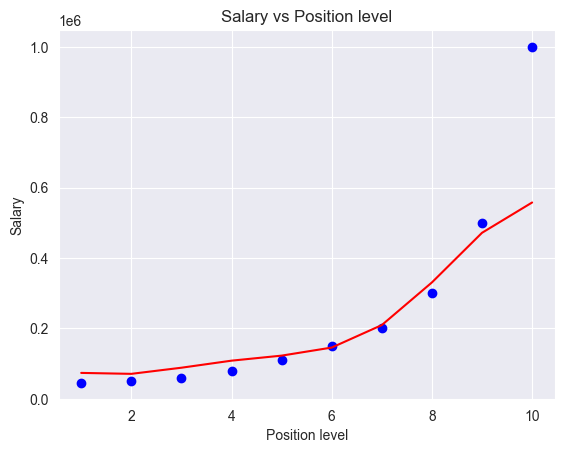

In [60]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'red')
plt.title('Salary vs Position level')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [61]:
# Vill göra plotten mjukare genom att öka upplösningen.
# Skapaer ett ny 'rutnät' (grid) på X axeln, som delar
# in intervallet i punkter med avståndet 0.1
# Räknar sedan ut vad modellen predicerar för dessa
# punter, och använter plot funktionen för att
# skriva ut punkterna i en graf och förbinda 
# med linjer


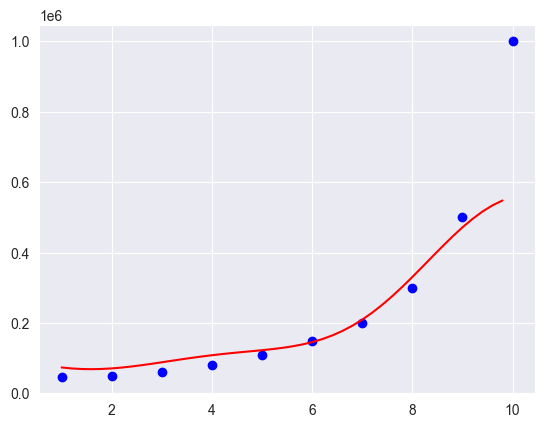

In [62]:
import warnings # Temp fix
warnings.simplefilter(action="ignore", category=DeprecationWarning)

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.2)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), color = 'blue')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'red')